### Import necessary packages

In [103]:
from datetime import datetime
#import it in console with: pip install pandas-datareader
import pandas_datareader.data as wb
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import matplotlib as mpl




### Load the data
Input:


| Argument   | Description                             |
|------------|-----------------------------------------|
| ticker     | list of choosen tickers                 |
| start_date | starte date of search in YYY-M-D format |
| end_date   | end of date search in YYYY-M-D format   |


Output: Pandas DataFrame with finance data from Yahoo

In [104]:
def get_data_from_api(ticker, start_date, end_date):
    dataframe = wb.DataReader(ticker, 'yahoo', start_date, end_date)
    return dataframe
start = datetime(1990,1,1)
end = datetime(2021,4,1)
df = get_data_from_api("MSFT", start, end)
df.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-30,233.850006,231.100006,233.529999,231.850006,24792000.0,231.850006
2021-03-31,239.100006,232.389999,232.910004,235.770004,43623500.0,235.770004
2021-04-01,242.839996,238.050003,238.470001,242.350006,30338000.0,242.350006


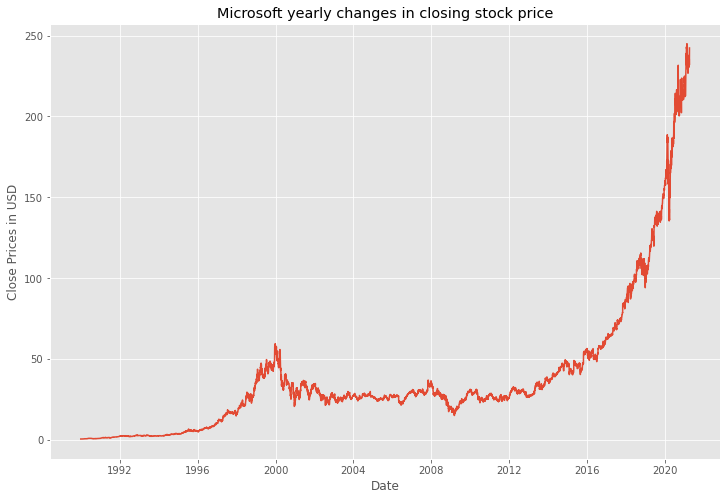

In [105]:
#plot close price
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices in USD')
plt.plot(df['Close'])
plt.title('Microsoft yearly changes in closing stock price')
plt.show()

### Visualize moving averages
Calculate moving averages based on closing price with a window of 5, 20, 100, and 200 days

In [106]:
close_px = df['Close']
MA5 = close_px.rolling(window = 5).mean()
MA20 = close_px.rolling(window = 20).mean()
MA100 = close_px.rolling(window = 100).mean()
MA200 = close_px.rolling(window = 200).mean()

Close price VS Moving Average 5/20/100/200 days of MSFT

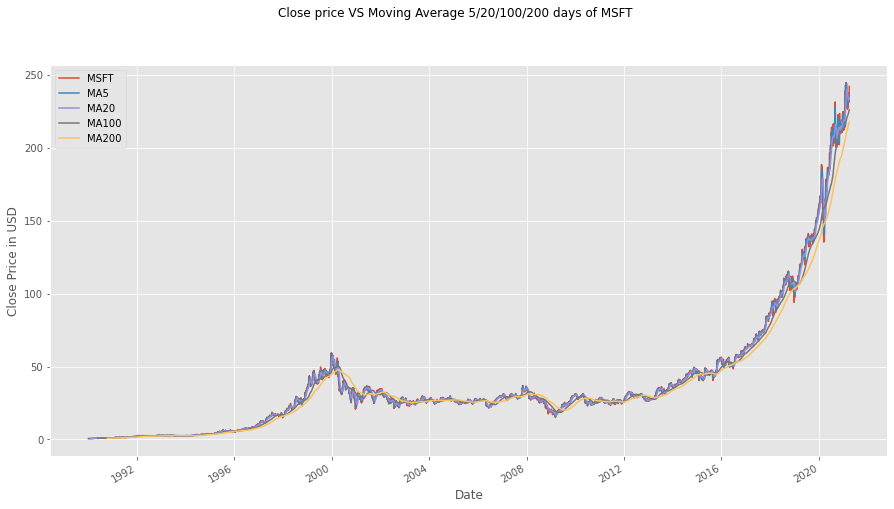

In [107]:
mpl.rc('figure', figsize=(15, 8))
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA5.plot(label = 'MA5')
MA20.plot(label = 'MA20')
MA100.plot(label = 'MA100')
MA200.plot(label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 5/20/100/200 days of MSFT')
plt.legend()

Close price VS Moving Average 5 days of MSFT

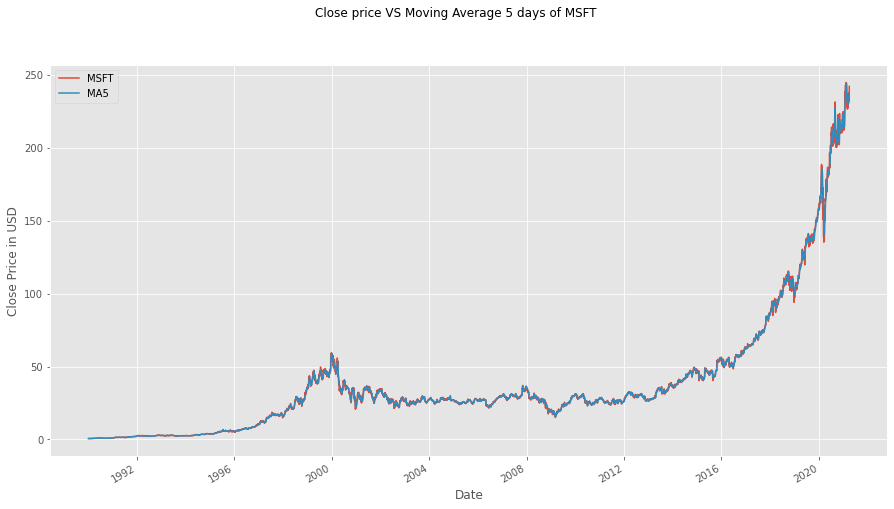

In [108]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA5.plot(label = 'MA5')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 5 days of MSFT')
plt.legend()

Close price VS Moving Average 20 days of MSFT

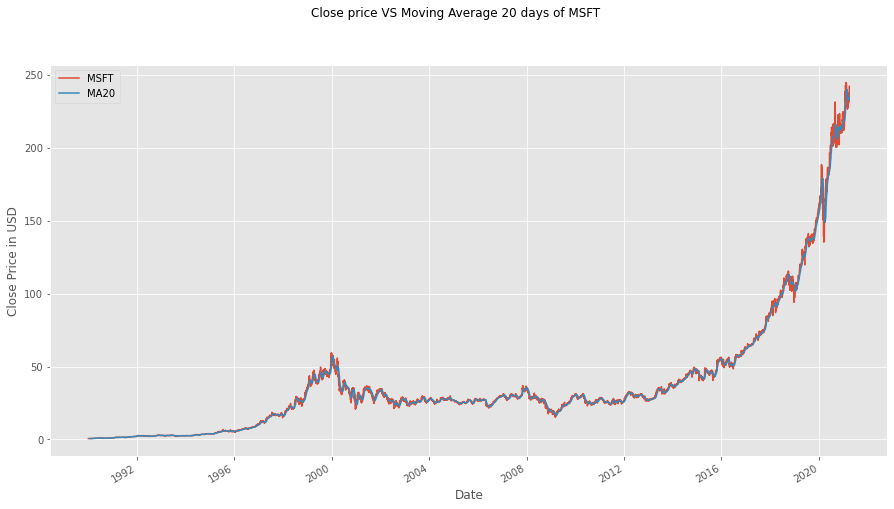

In [109]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA20.plot(label = 'MA20')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 20 days of MSFT')
plt.legend()

Close price VS Moving Average 100 days of MSFT

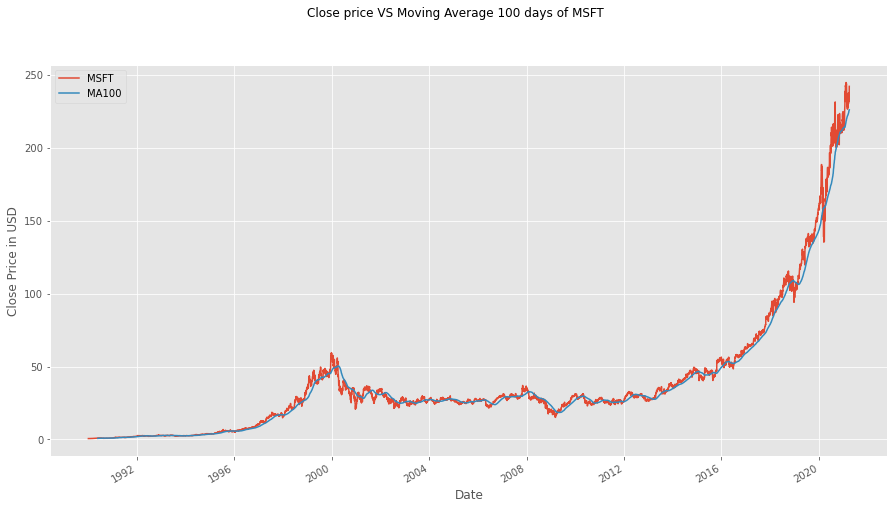

In [110]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA100.plot(label = 'MA100')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 100 days of MSFT')
plt.legend()

Close price VS Moving Average 200 days of MSFT

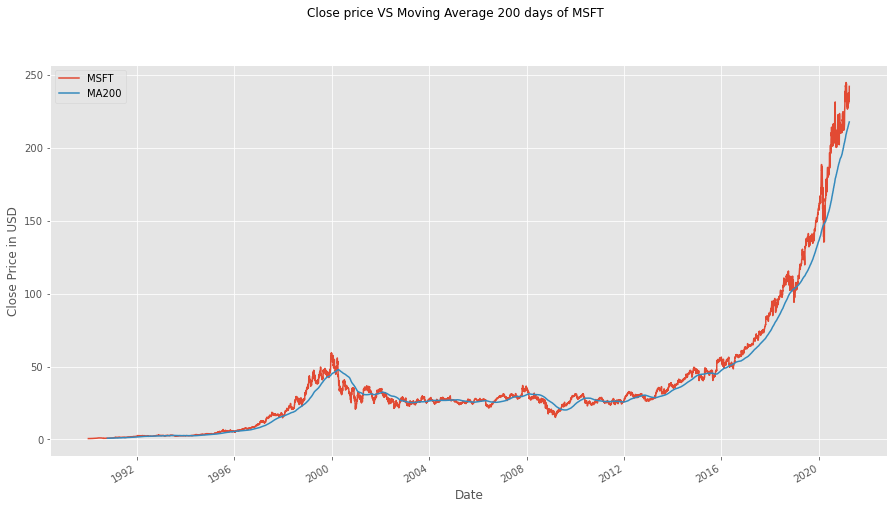

In [111]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA200.plot(label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 200 days of MSFT')
plt.legend()

### Preprocess data for showing MA in 2020

In [112]:
#Seperate dataframe so we keep original for further exploration
ma_df = df
#Set index as datetime
ma_df.index = pd.to_datetime(ma_df.index)
#Set label by shifting Closing price by -1
ma_df['Label'] = ma_df['Close'].shift(-1)
#Log_r
log_r = np.log(ma_df['Close'] / ma_df['Close'].shift(1))

#Drop non-used columns
ma_df = ma_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)

#Drop NaN values
ma_df = ma_df.dropna()

#Standarizing
ma_df = (ma_df - ma_df.mean())/ma_df.std()

## rolling mean
close_px = ma_df['Close']
ma_df['MA5'] = close_px.rolling(5,min_periods=1).mean()
ma_df['MA20'] = close_px.rolling(20,min_periods=1).mean()
ma_df['MA100'] = close_px.rolling(100,min_periods=1).mean()
ma_df['MA200'] = close_px.rolling(200,min_periods=1).mean()
print(ma_df.tail())

               Close     Label       MA5      MA20     MA100     MA200
Date                                                                  
2021-03-25  4.458351  4.546712  4.504430  4.482207  4.288296  4.100540
2021-03-26  4.553543  4.518239  4.532619  4.486920  4.296116  4.105097
2021-03-29  4.525031  4.440397  4.529170  4.484966  4.303683  4.110727
2021-03-30  4.447085  4.530409  4.502820  4.482643  4.309528  4.115798
2021-03-31  4.537218  4.681501  4.504246  4.492082  4.313984  4.121182


MA5 and close price in 2020

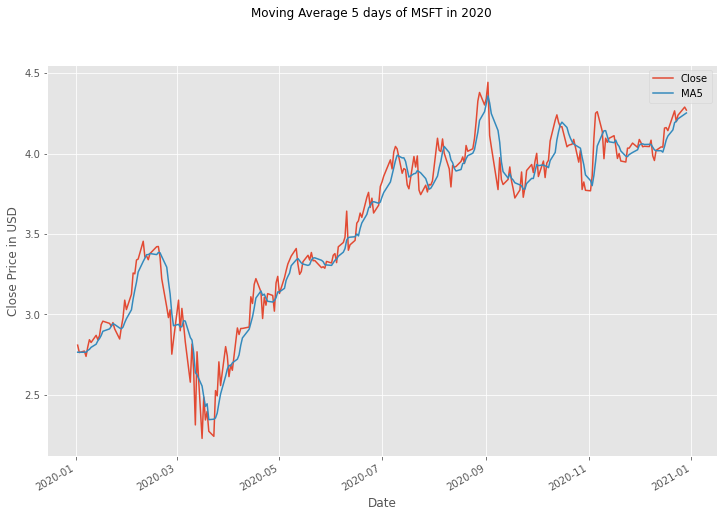

In [113]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA5'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA5')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 5 days of MSFT in 2020')
plt.legend()


MA20 and close price in 2020

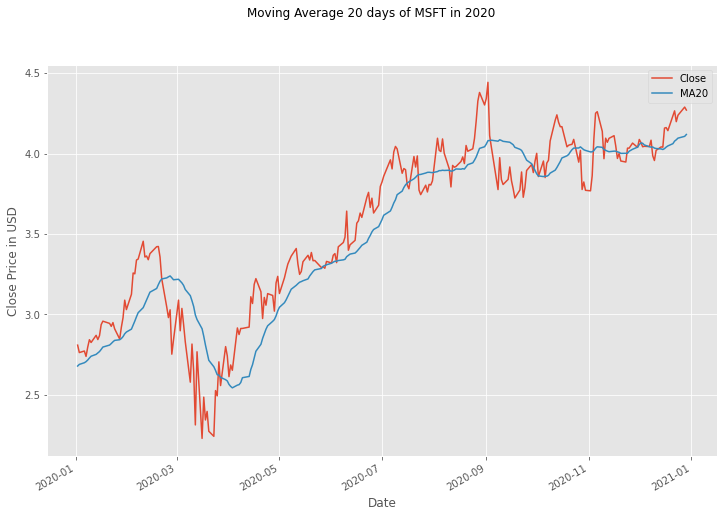

In [114]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA20'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA20')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 20 days of MSFT in 2020')
plt.legend()

MA100 and close price in 2020

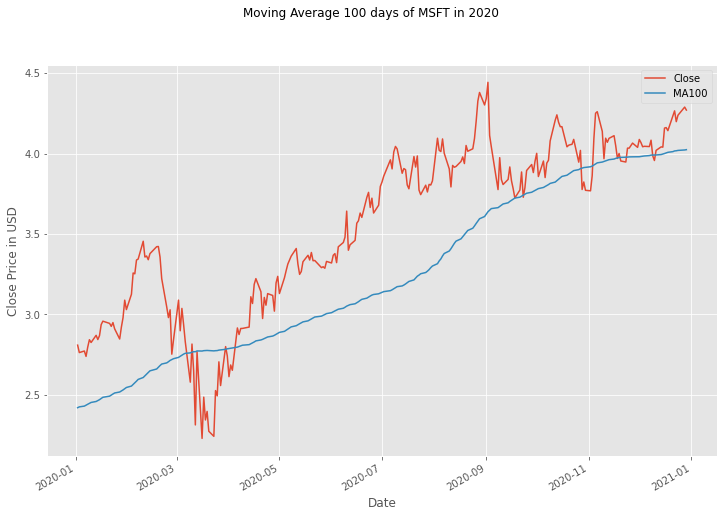

In [115]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA100'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA100')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 100 days of MSFT in 2020')
plt.legend()


MA200 and close price in 2020

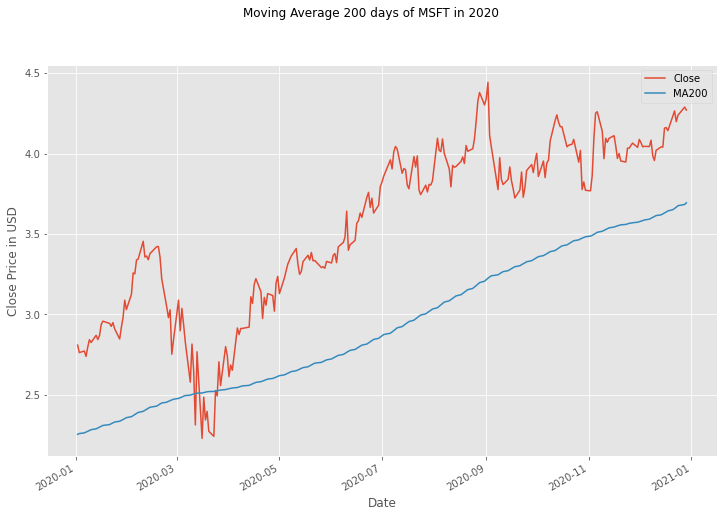

In [116]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA200'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 200 days of MSFT in 2020')
plt.legend()


Plot these four MA values with close price in the same chart

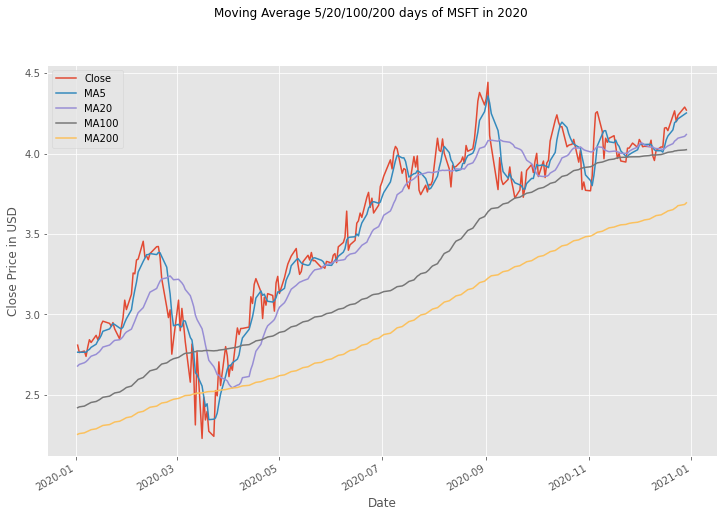

In [117]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df["MA5"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA5')
ma_df["MA20"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA20')
ma_df["MA100"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA100')
ma_df["MA200"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA200')

plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 5/20/100/200 days of MSFT in 2020')
plt.legend()

## Pre-process data function
Since the various models require somewhat different pre-processing a function that handles the various needs is created.

| Argument         | Description                                                  |
|------------------|--------------------------------------------------------------|
| raw_df           | Dataframe input                                              |
| Standarize       | Boolean if the data should be standarized or not             |
| Drop_standard    | Boolean if standard values should be removed or not          |
| calculation      | Array containing which calculations that should be performed |
| calculations []  | MA5, MA20, MIN, MAX, mom, vola                               |

In [148]:
#Preprocess data
def process_data(raw_df, standarize, drop_standard, calculations):
        #Set index as datetime
        raw_df.index = pd.to_datetime(raw_df.index)
        #Set label by shifting Closing price by -1
        raw_df['Label'] = raw_df['Close'].shift(-1)
         #Creating more features
        #Log_r
        log_r = np.log(raw_df['Close'] / raw_df['Close'].shift(1))
        max_roll_window = 0
        #Check which calculations should be applied
        if 'MA5' in calculations:
            raw_df['MA5'] = raw_df['Close'].rolling(5).mean()
            max_roll_window = 5
        if 'MA20' in calculations:
            raw_df['MA20'] = raw_df['Close'].rolling(20).mean()
            max_roll_window = 20
        if 'MIN' in calculations:
            raw_df['MIN'] = raw_df['Close'].rolling(max_roll_window).min()
        if 'MAX' in calculations:
            raw_df['MAX'] = raw_df['Close'].rolling(max_roll_window).max()
        if 'mom' in calculations:
            raw_df['mom'] = log_r.rolling(max_roll_window).mean()
        if 'vola' in calculations:
            raw_df['vola'] = log_r.rolling(max_roll_window).std()

        #Drop non-used columns
        if drop_standard:
            raw_df = raw_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        #Drop NaN values
        raw_df = raw_df.dropna()
        #Standarizing
        if standarize:
            raw_df = (raw_df - raw_df.mean())/raw_df.std()
        return raw_df

### MLP Regression With Close, MA5 and MA20 as features

#### Pre-process data

In [149]:
df_MLP = get_data_from_api("MSFT", start, end)
proc_df = process_data(df_MLP, True, True, ['MA5', 'MA20'])

#### Split data

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    proc_df[['Close', 'MA5', 'MA20']], proc_df['Label'], shuffle=False, test_size=0.2)


#### Perform the model

In [151]:
from sklearn.neural_network import MLPRegressor
#MLP
rnd_state = 1
max_it = 600
regr = MLPRegressor(random_state = rnd_state, max_iter = max_it).fit(X_train, y_train)

MLPpredictions = regr.predict(X_test)

#### Visualize to understand the model behaviour

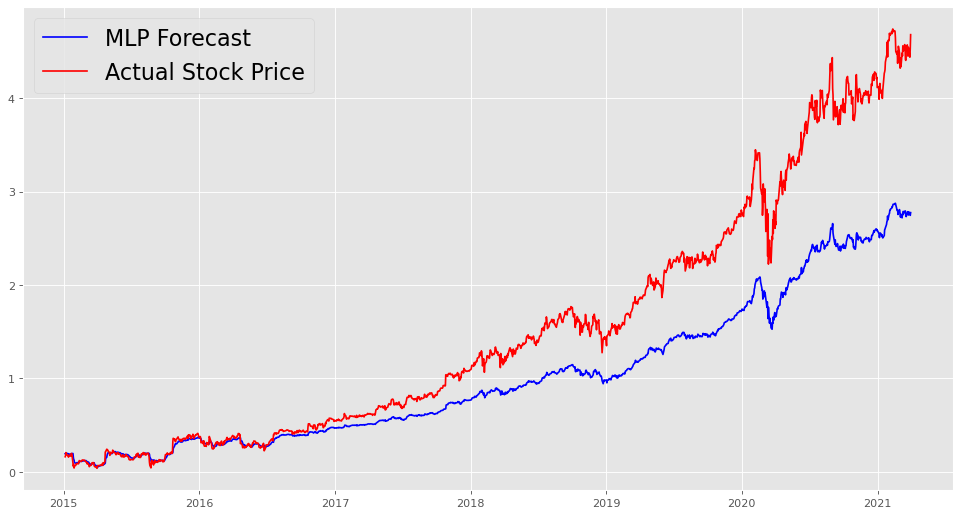

In [152]:

plt.figure(figsize = (15,8), dpi = 80)
df_pred = pd.DataFrame(data=y_test)
df_pred['MLP'] = MLPpredictions

plt.plot(df_pred['MLP'], color="blue", label='MLP Forecast')
plt.plot(df_pred['Label'], color = 'red', label='Actual Stock Price')
plt.legend(loc='upper left', fontsize=20)
plt.show()

#### Error measurements

In [153]:
#print error measurements
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#Calculate error measurements
#MSE, RMSE, MAE, MAPE

MSE_error_MLPR = mean_squared_error(y_test, MLPpredictions)
RMSE_error_MLPR = mean_squared_error(y_test, MLPpredictions, squared=False)
MAE_error_MLPR = mean_absolute_error(y_test, MLPpredictions)

print("Score: ",regr.score(X_train, y_train))
print("Score: ",regr.score(X_test, y_test))
df_error = pd.DataFrame(data = {'Model': ['MLP'], 'MSE': [MSE_error_MLPR], 'RMSE': RMSE_error_MLPR, 'MAE': MAE_error_MLPR}, index=['Model 1'])
df_error.head(10)


Score:  0.9964557665294026
Score:  0.6734263740519073


,Model,MSE,RMSE,MAE
Model 1,MLP,0.559366,0.747907,0.519211


### MLP Regression with more features
To further improve the prediction of the model, we added more features

#### Pre-process data

In [154]:
df_MLP2 = get_data_from_api("MSFT", start, end)
proc_df2 = process_data(df_MLP2, True, True, ['MA5', 'MA20', 'MIN', 'MAX', 'mom', 'vola'])

#### Split data

In [155]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    proc_df2[['Close', 'MA5', 'MA20', 'MIN', 'MAX', 'mom', 'vola']], proc_df2['Label'], shuffle=False, test_size=0.2)

#### Perform the model

In [156]:
rnd_state = 1
max_it = 600
regr2 = MLPRegressor(random_state = rnd_state, max_iter = max_it).fit(X_train2, y_train2)

MLPpredictions2 = regr2.predict(X_test2)

#### Visualize to understand the model behaviour

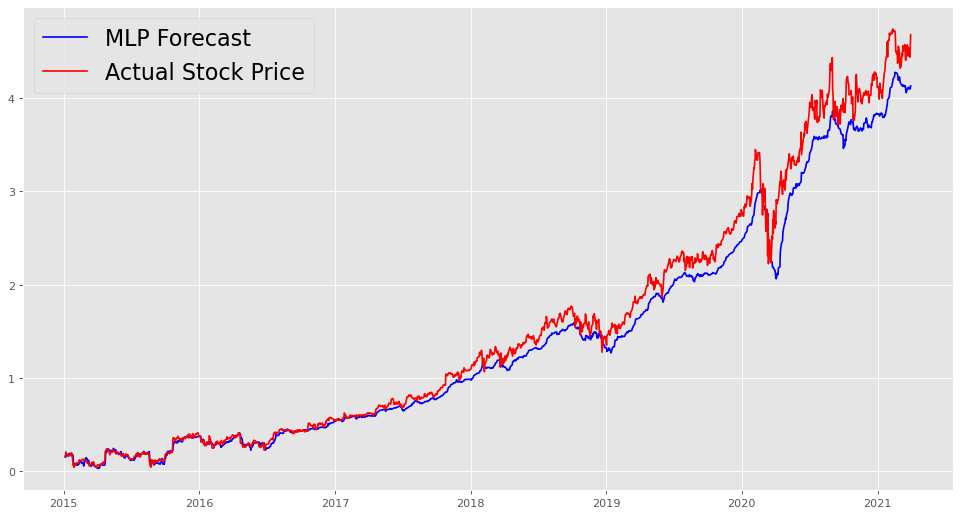

In [157]:

plt.figure(figsize = (15,8), dpi = 80)
df_pred2 = pd.DataFrame(data=y_test2)
df_pred2['MLP'] = MLPpredictions2

plt.plot(df_pred2['MLP'], color="blue", label='MLP Forecast')
plt.plot(df_pred2['Label'], color = 'red', label='Actual Stock Price')
plt.legend(loc='upper left', fontsize=20)
plt.show()

#### Error measurements

In [158]:

MSE_error_MLPR2 = mean_squared_error(y_test2, MLPpredictions2)
RMSE_error_MLPR2 = mean_squared_error(y_test2, MLPpredictions2, squared=False)
MAE_error_MLPR2 = mean_absolute_error(y_test2, MLPpredictions2)

print("Score: ",regr2.score(X_train2, y_train2))
print("Score: ",regr2.score(X_test2, y_test2))
df_error2 = pd.DataFrame(data = {'Model': ['MLP'], 'MSE': [MSE_error_MLPR2], 'RMSE': RMSE_error_MLPR2, 'MAE': MAE_error_MLPR2}, index=['Model 1'])
df_error2.head(10)

Score:  0.9961134529381035
Score:  0.9753143186831463


,Model,MSE,RMSE,MAE
Model 1,MLP,0.042281,0.205624,0.141215


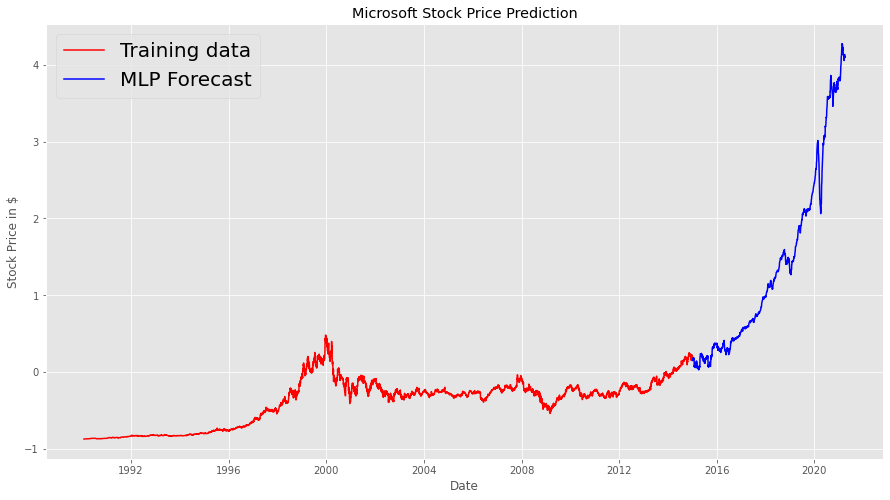

In [159]:
plt.plot(y_train2, color='red', label='Training data')
#plt.plot(y_test, color = 'blue', label='Actual Stock Price')
plt.plot(df_pred2['MLP'], color = 'blue',label='MLP Forecast')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price in $')
plt.legend(loc='upper left', fontsize=20)
plt.show()

## Trained MLP Model used on Apple Stock

In [172]:
df_MLP2_apple = get_data_from_api("AAPL", start, end)
proc_df2_apple = process_data(df_MLP2_apple, True, True, ['MA5', 'MA20', 'MIN', 'MAX', 'mom', 'vola'])

#### Split data

In [173]:
X_train2_apple, X_test2_apple, y_train2_apple, y_test2_apple = train_test_split(
    proc_df2_apple[['Close', 'MA5', 'MA20', 'MIN', 'MAX', 'mom', 'vola']], proc_df2_apple['Label'], shuffle=False, test_size=0.2)

#### Perform the model

In [174]:
MLPpredictions2_apple = regr2.predict(X_test2_apple)

#### Visualize to understand the model behaviour

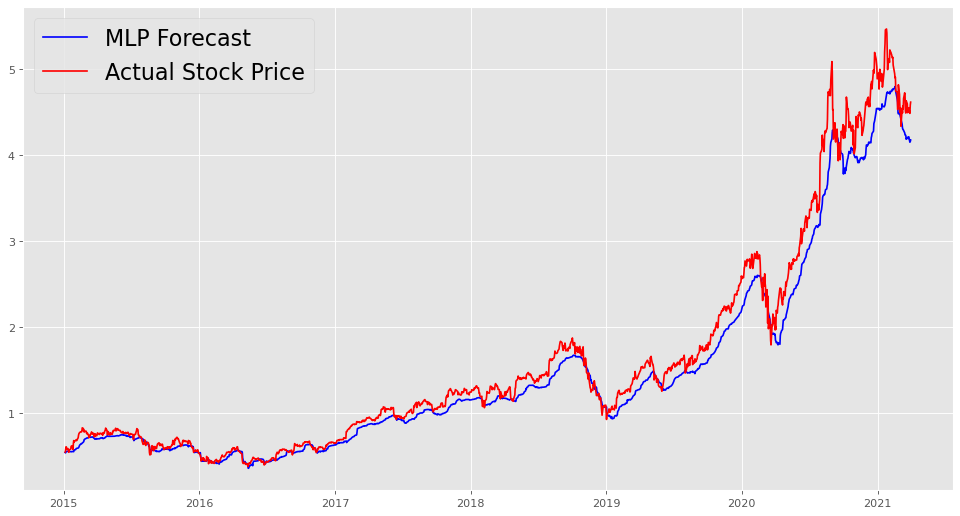

In [175]:

plt.figure(figsize = (15,8), dpi = 80)
df_pred2_apple = pd.DataFrame(data=y_test2_apple)
df_pred2_apple['MLP'] = MLPpredictions2_apple

plt.plot(df_pred2_apple['MLP'], color="blue", label='MLP Forecast')
plt.plot(df_pred2_apple['Label'], color = 'red', label='Actual Stock Price')
plt.legend(loc='upper left', fontsize=20)
plt.show()

#### Error measurements

In [176]:

MSE_error_MLPR2_apple = mean_squared_error(y_test2_apple, MLPpredictions2_apple)
RMSE_error_MLPR2_apple = mean_squared_error(y_test2_apple, MLPpredictions2_apple, squared=False)
MAE_error_MLPR2_apple = mean_absolute_error(y_test2_apple, MLPpredictions2_apple)

print("Score: ",regr2.score(X_train2_apple, y_train2_apple))
print("Score: ",regr2.score(X_test2_apple, y_test2_apple))
df_error2 = pd.DataFrame(data = {'Model': ['MLP'], 'MSE': [MSE_error_MLPR2_apple], 'RMSE': RMSE_error_MLPR2_apple, 'MAE': MAE_error_MLPR2_apple}, index=['Model 1'])
df_error2.head(10)

Score:  0.9966675490458308
Score:  0.9712131967019063


,Model,MSE,RMSE,MAE
Model 1,MLP,0.04368,0.208997,0.144769


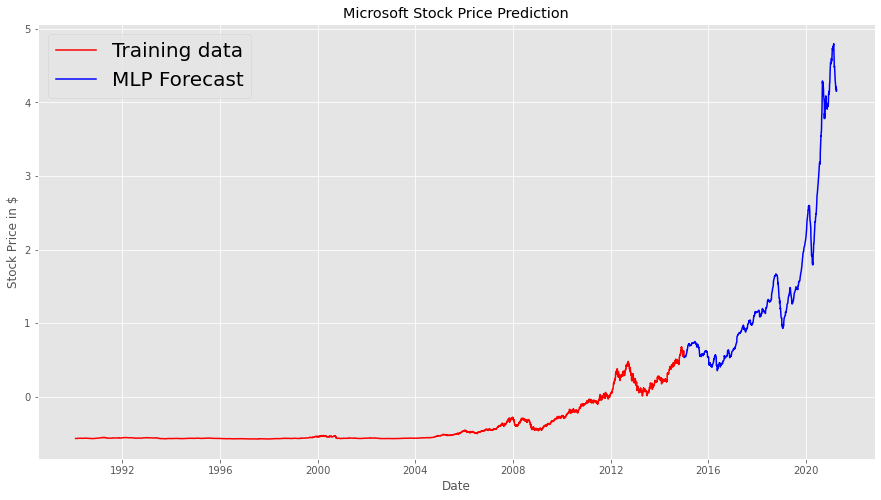

In [177]:
plt.plot(y_train2_apple, color='red', label='Training data')
#plt.plot(y_test, color = 'blue', label='Actual Stock Price')
plt.plot(df_pred2_apple['MLP'], color = 'blue',label='MLP Forecast')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price in $')
plt.legend(loc='upper left', fontsize=20)
plt.show()




## ARIMA MODEL

                 Close
Date                  
2020-01-02  160.619995
2020-01-03  158.619995
2020-01-04  158.756663
2020-01-05  158.893331
2020-01-06  159.029999
Testing Mean Squared Error is 7.494103109000235


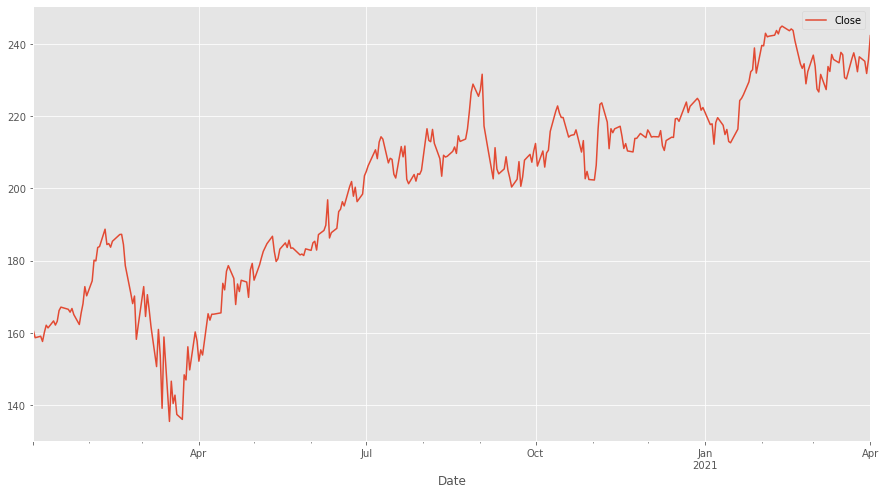

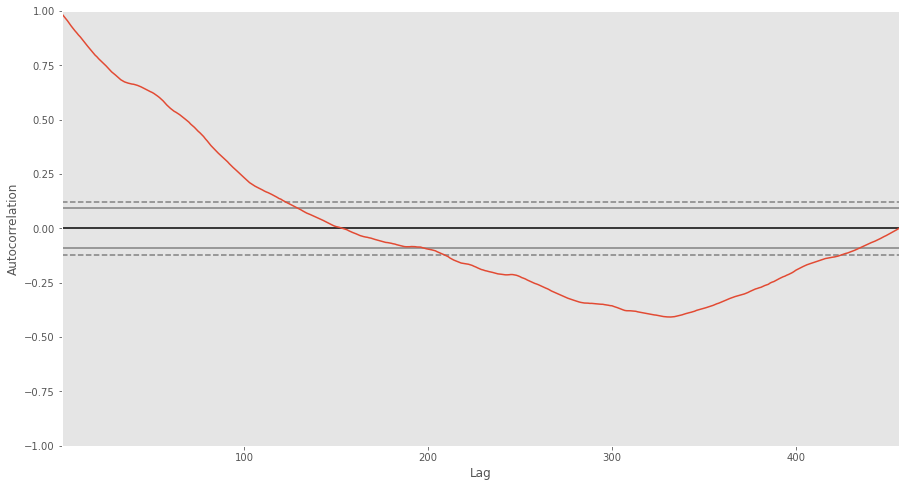

In [180]:
from pandas.plotting import autocorrelation_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings("ignore")

start2 = datetime(2020,1,1)
end2 = datetime(2021,4,4)
arima_df = get_data_from_api("MSFT", start2, end2)
arima_df = arima_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)

#Set index as datetime
arima_df.index = pd.to_datetime(arima_df.index)
#Resample with day to day basis
arima_df = arima_df.resample('D').mean()
#Fill in missing days
arima_df["Close"] = arima_df["Close"].interpolate(method='linear', axis=0).ffill().bfill()
#Set frequency to daily
arima_df.index.freq = 'D'

arima_df.head(10)
print(arima_df.head())
arima_df.plot()
plt.show()

autocorrelation_plot(arima_df)
plt.show()

train_data, test_data = arima_df[0:int(len(arima_df)*0.8)], arima_df[int(len(arima_df)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

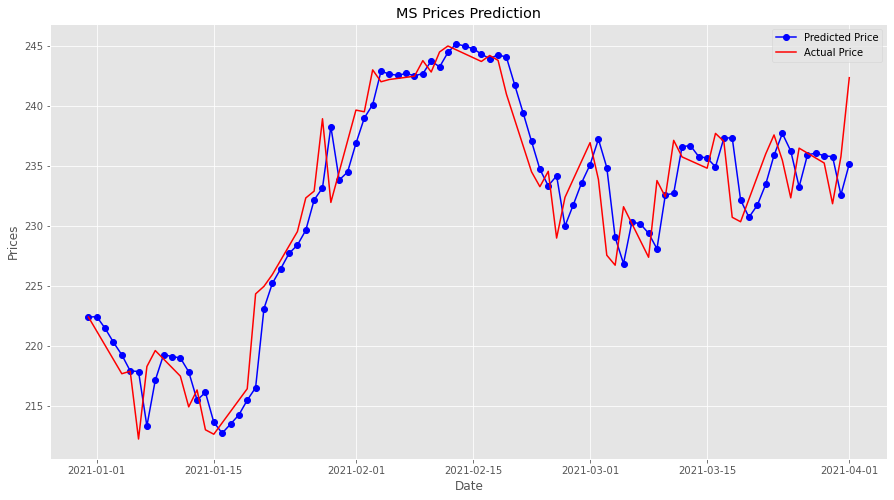

In [181]:
test_set_range = arima_df[int(len(arima_df)*0.8):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('MS Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()


In [182]:
# GA ANN Model with PyGAD
# pip install pygad
# https://github.com/ahmedfgad/NeuralGenetic/blob/master/example_regression.py
from pandas import read_csv
import pandas_datareader.data as wb
from datetime import datetime

# load dataset
def get_data_from_api(ticker, start_date, end_date):
    dataframe = wb.DataReader(ticker, 'yahoo', start_date, end_date)
    return dataframe

start = datetime(1990,1,1)
end = datetime(2021,4,1)
tickerList = 'MSFT'
df = get_data_from_api(tickerList, start, end)
df = df[['Close']]

# split into train and test sets
X = df.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
# create lists for use with PyGAD
train = [x[0] for x in train]
test = [x[0] for x in test]

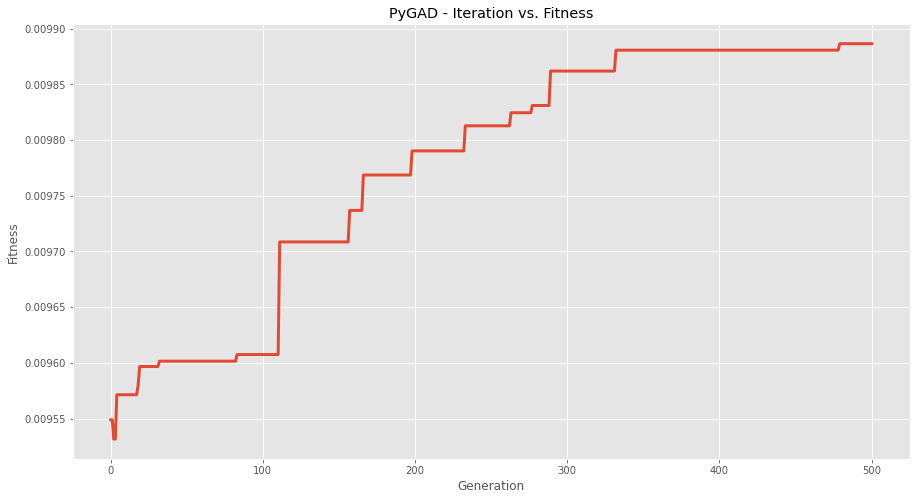

Fitness value of the best solution = 0.00988653429159675
Index of the best solution : 0
Best fitness value reached after 479 generations.
Predictions of the trained network : [array([-90.88982051, -71.71126448,  42.70322303, ...,  47.81690406,
       -46.99764284,   3.63808798])]
Absolute error : 101.1476793086096.


In [183]:
import numpy
import pygad
import pygad.nn
import pygad.gann

def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs, problem_type="regression")
    solution_fitness = 1.0/numpy.mean(numpy.abs(predictions - data_outputs))

    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    #print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    #print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    #print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy()

# Holds the fitness value of the previous generation.
last_fitness = 0

# Preparing the NumPy array of the inputs.
data_inputs = numpy.array([train])

# Preparing the NumPy array of the outputs.
data_outputs = numpy.array([test])

# The length of the input vector for each sample (i.e. number of neurons in the input layer).
num_inputs = data_inputs.shape[1]

# Creating an initial population of neural networks. The return of the initial_population() function holds references to the networks, not their weights. Using such references, the weights of all networks can be fetched.
num_solutions = 6 # A solution or a network can be used interchangeably.
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=len(test),
                                hidden_activations=["relu"],
                                output_activation="None")

# population does not hold the numerical weights of the network instead it holds a list of references to each last layer of each network (i.e. solution) in the population. A solution or a network can be used interchangeably.
# If there is a population with 3 solutions (i.e. networks), then the population is a list with 3 elements. Each element is a reference to the last layer of each network. Using such a reference, all details of the network can be accessed.
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
initial_population = population_vectors.copy()

num_parents_mating = 4 # Number of solutions to be selected as parents in the mating pool.

num_generations = 500 # Number of generations.

mutation_percent_genes = 5 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.

parent_selection_type = "sss" # Type of parent selection.

crossover_type = "single_point" # Type of the crossover operator.

mutation_type = "random" # Type of the mutation operator.

keep_parents = 1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

init_range_low = -1
init_range_high = 1

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
##print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Predicting the outputs of the data using the best solution.
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs,
                               problem_type="regression")
print("Predictions of the trained network : {predictions}".format(predictions=predictions))

# Calculating some statistics
abs_error = numpy.mean(numpy.abs(predictions - data_outputs))
print("Absolute error : {abs_error}.".format(abs_error=abs_error))

In [184]:
#Vizualize the predictions
pred = numpy.array(predictions)

print(pred)
print("What its supposed to be under:")
print(data_outputs)

[[-90.88982051 -71.71126448  42.70322303 ...  47.81690406 -46.99764284
    3.63808798]]
What its supposed to be under:
[[ 47.02000046  46.45000076  46.75999832 ... 231.8500061  235.77000427
  242.3500061 ]]


In [185]:
pred_flat = pred.flatten()
output_flat = test

In [186]:
t = numpy.array(test)
t_flat = t.flatten()

print(t_flat)
print(pred_flat)

[ 47.02000046  46.45000076  46.75999832 ... 231.8500061  235.77000427
 242.3500061 ]
[-90.88982051 -71.71126448  42.70322303 ...  47.81690406 -46.99764284
   3.63808798]


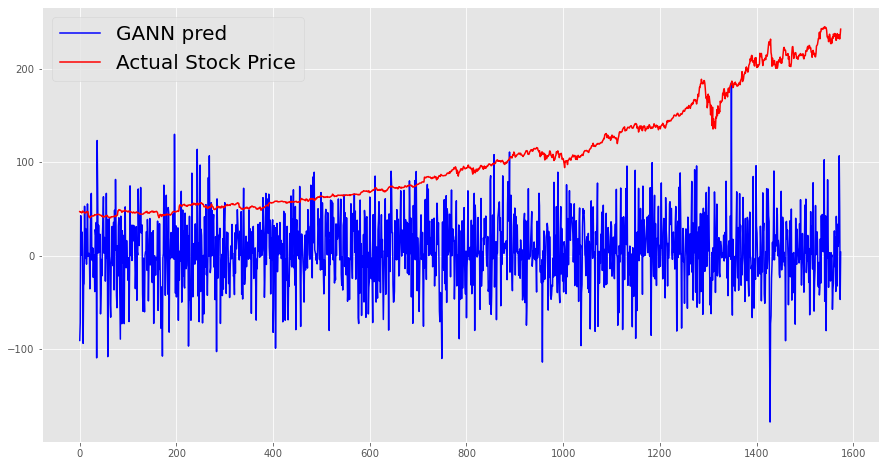

In [187]:
plt.plot(pred_flat, color="blue", label='GANN pred')
plt.plot(t_flat, color = 'red', label='Actual Stock Price')
plt.legend(loc='upper left', fontsize=20)
plt.show()

In [188]:
# See block above, we need to understand the code and find out what the predictions really is